# Analyze the US Distribution of Wealth, economic and social gaps by State



You are working as a Research Analyst at a renowned consultancy. After working on a previous project and identifying the US as an ideal country for investment, it’s time to dig deeper into the numbers. <br>
The main objective is to create a development impact assessment. <br>
In order to achieve sustainability goals, it’s important to choose sites with the right population, education, infrastructure, purchasing power and diversification.

You will first need to choose significant variables through visualization, factorial analysis, group similar variables together and finally create clusters of states with similar characteristics.

Perform your analysis in the following order:

> 1) **Exploratory Data Analysis** <br>
> 2) **Statistics and Probability**<br>
> 3) **Machine Learning**<br>


Your analysis will help rank states by multiple factors to show which would benefit from which projects and what they can become like after such projects are implemented.

In [78]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import altair as alt
sns.set()

#import data
data = pd.read_excel("US State Data.xlsx")

# import altair as alt (Graphs look better in quality than matplotlib)

## **Get to know the Data**
Transform all data into a cross sectional format as follows (Each variable vertically has 50 observations for all states)

In [79]:
df = pd.read_excel("US State Data Transformed.xlsx")
# Remove 0-based index and start with 1 instead
df.index = df.index + 1
# Replace all missing values / NaNs with zeros in entire DataFrame
df.fillna(0, inplace=True)
df.head(10)

,State,Total Population 2021,Population Growth or Decline 2010 to 2021,Households 2020,Labor Force (persons) Ann. Avg. 2021,Unemployment Rate Ann. Avg. 2021,Per Capita Personal Income 2021,Median Household Income 2020,Poverty Rate 2020,High School Diploma or More - Pct. of Adults 25+ 2020,...,Unemployment Rate 5-Year Pct. Chg,Unemployment Rate 10-Year Pct. Chg,Total Population 25 and Older,Less than 9th Grade,"9th to 12th, No Diploma",High School Graduate (includes equiv.),"Some College, No Degree",Associate Degree,Bachelor's Degree,"Graduate, Professional or Doctorate Degree"
1,Alabama,5039877,0.054,1888504,0.0,0.0,49769,53958,14.9,0.869,...,0.000,0.000,3344006,133650,305297,1014342,721609,292064,546674,330370
2,Alaska,732673,0.032,255173,0.0,0.0,65813,79961,9.6,0.931,...,0.000,0.000,483436,11513,21663,137486,125645,42162,90161,54806
3,Arizona,7276316,0.138,2643430,0.0,0.0,55487,64652,12.8,0.879,...,0.000,0.000,4846056,248570,339349,1151988,1208298,429153,911228,557470
4,Arkansas,3025891,0.038,1170544,0.0,0.0,50625,51146,15.2,0.872,...,0.000,0.000,2026722,95403,164957,686812,445268,151587,308648,174047
5,California,39237836,0.053,13103114,0.0,0.0,76614,83001,11.5,0.839,...,0.000,0.000,26665143,2367996,1918542,5431385,5566520,2123827,5764827,3492046
6,Colorado,5812069,0.156,2137402,0.0,0.0,70706,77688,9.0,0.921,...,0.000,0.000,3900754,128623,180162,827081,809908,332127,1015989,606864
7,Connecticut,3605597,0.009,1385437,0.0,0.0,83294,79723,9.7,0.909,...,0.000,0.000,2489205,99436,126114,655381,419238,193036,551459,444541
8,Delaware,1003384,0.117,370953,496430.0,5.3,59931,71335,10.9,0.906,...,0.178,-0.303,679870,22233,41610,210998,128397,54589,129092,92951
9,Florida,21781128,0.158,7931313,10312768.0,4.6,62270,61724,12.4,0.885,...,-0.061,-0.540,15255326,701815,1049983,4308542,3013331,1521709,2938593,1721353
10,Georgia,10799566,0.115,3830264,5186969.0,3.9,55786,62800,14.0,0.879,...,-0.278,-0.614,6996425,311893,536760,1925374,1410017,559719,1377311,875351


In [80]:
# Check data types
df.info()
# Count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Columns: 116 entries, State to Graduate, Professional or Doctorate Degree
dtypes: float64(33), int64(82), object(1)
memory usage: 45.4+ KB


State                                         0
Total Population 2021                         0
Population Growth or Decline 2010 to 2021     0
Households 2020                               0
Labor Force (persons) Ann. Avg. 2021          0
                                             ..
High School Graduate (includes equiv.)        0
Some College, No Degree                       0
Associate Degree                              0
Bachelor's Degree                             0
Graduate, Professional or Doctorate Degree    0
Length: 116, dtype: int64

### **Visualization of Demographics**

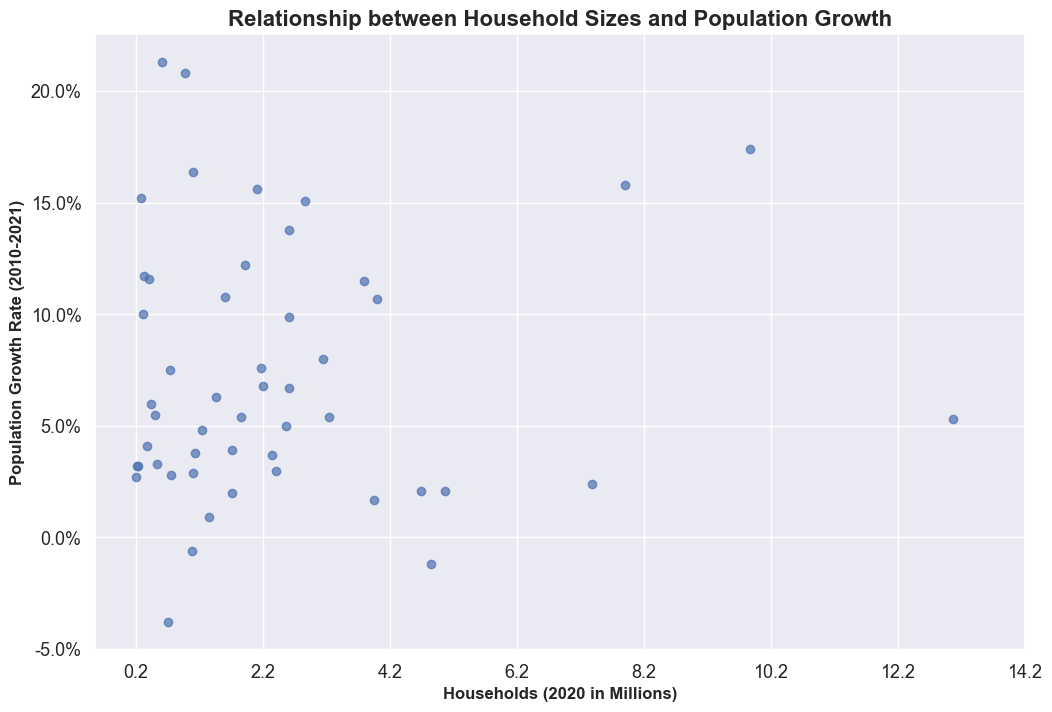

In [92]:
# Population growth trends from 2010 to 2021 and Households sizes in 2020 makeup across states using scatterplots
df_population = df[["State", "Total Population 2021", "Population Growth or Decline 2010 to 2021", "Households 2020",]]

y = df_population["Households 2020"]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_population["Households 2020"],
                df_population["Population Growth or Decline 2010 to 2021"],                
                alpha = 0.7,
                )

# Choose the interval to space out yticks
_min = np.min(y)
diff = 2_000_000  # Set the desired interval (e.g., 1 million)
ticks = np.arange(_min, np.max(y) + diff, diff)

plt.xticks(ticks=ticks, labels=[f"{val/1e6:.1f}" for val in ticks], fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))

plt.title("Relationship between Household Sizes and Population Growth", fontsize = 16, weight = "bold")
plt.xlabel("Households (2020 in Millions)", fontweight = "bold")
plt.ylabel("Population Growth Rate (2010-2021)", fontweight = "bold")
plt.show()

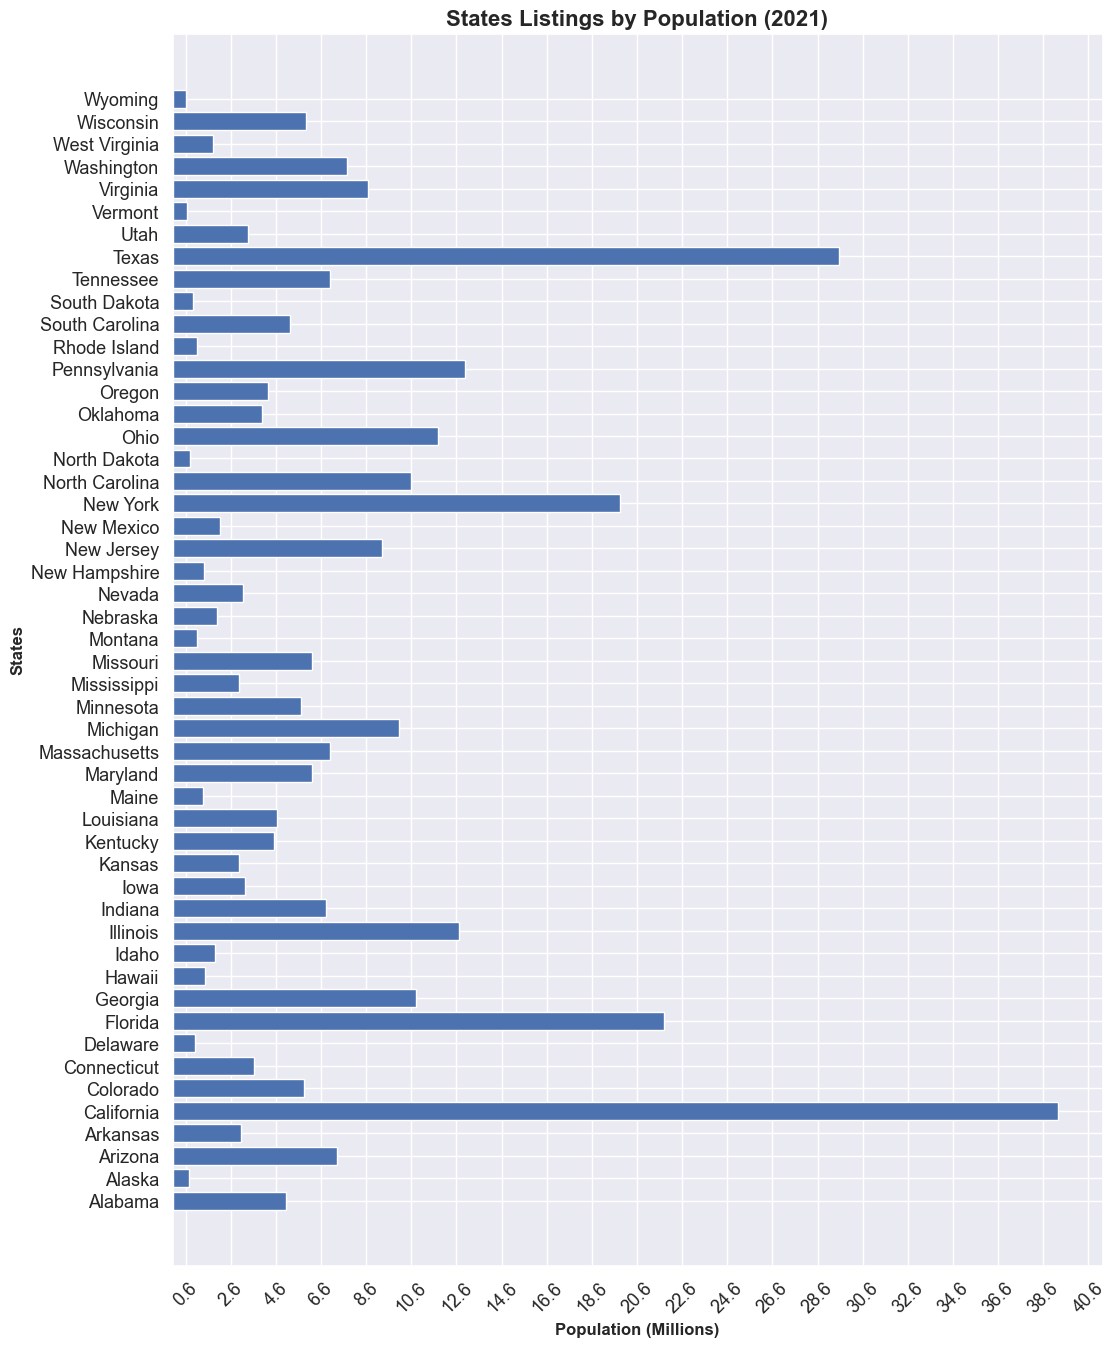

In [94]:
# Compare the total population of each state in 2021 using a horizontal bar chart. X-axis: Population, Y-axis: States.
# sns.set_style('white')
plt.figure(figsize = (12, 16))
x = df_population["Total Population 2021"]
y = df_population["State"]

plt.barh(y=y,
         width=x,
         )
# Choose the interval to space out xticks
_min = np.min(x)
diff = 2_000_000  # Set the desired interval (e.g., 1 million)
ticks = np.arange(_min, np.max(x) + diff, diff)

plt.xticks(ticks=ticks, labels=[f"{val/1e6:.1f}" for val in ticks], rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("States Listings by Population (2021)", fontsize = 16, fontweight = "bold")
plt.xlabel("Population (Millions)", fontweight = "bold")
plt.ylabel("States", fontweight = "bold")
# sns.despine()
plt.show()

* In this bar chart chart, California, Texas, and Florida are shown to be the most populous states.
* States like Wyoming, Vermont, and Alaska have the smallest populations.
* States like New York, Pennsylvania, Ohio, and Illinois fall in the middle range in terms of population

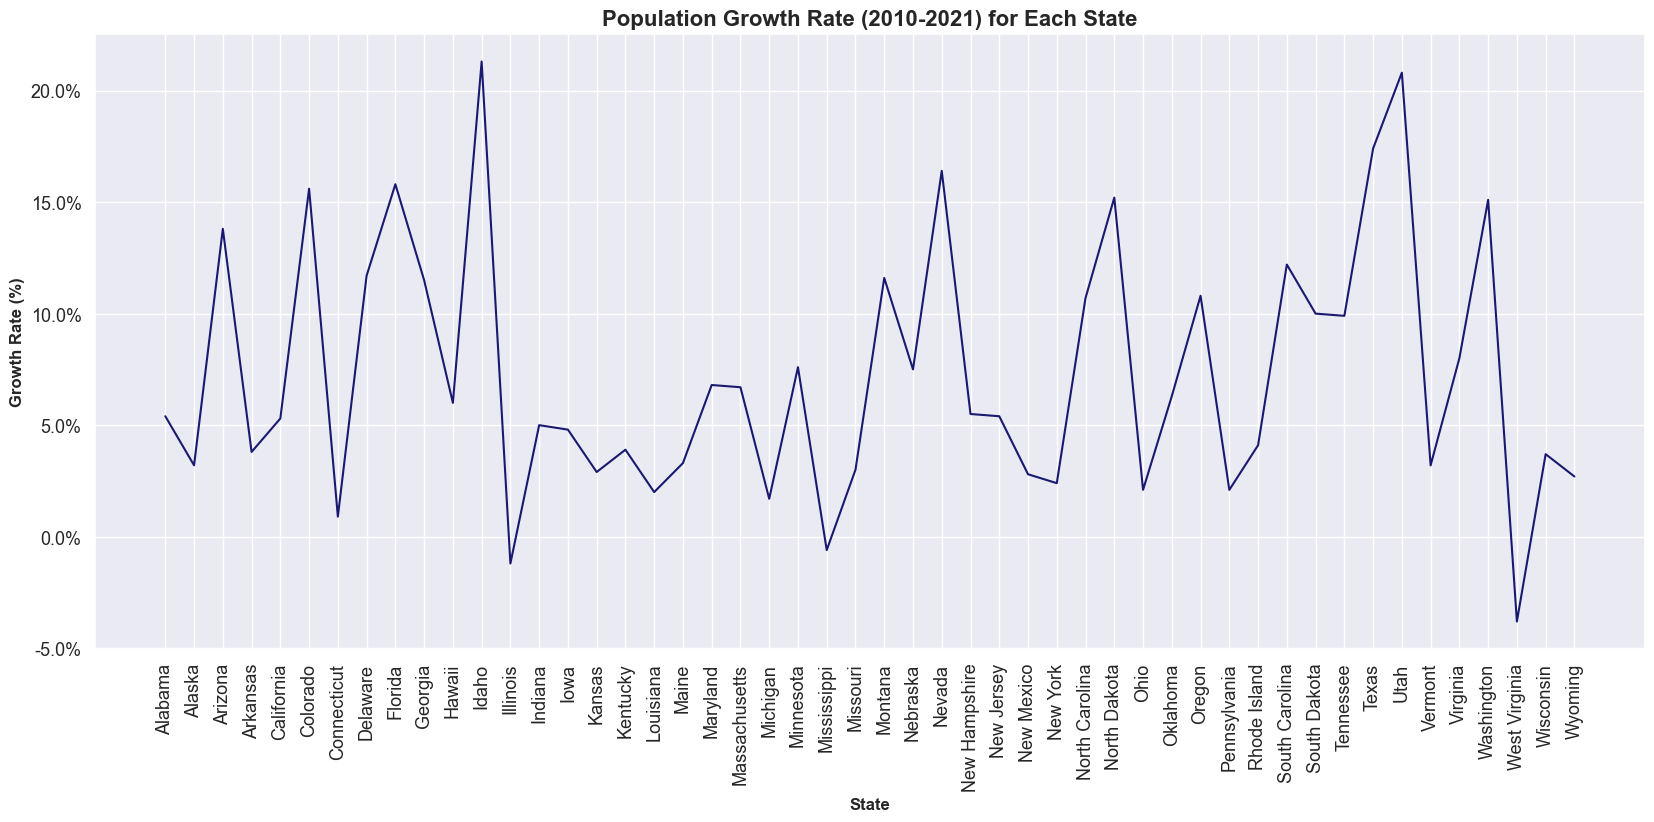

In [96]:
# Create a line chart to compare the population growth rate from 2010 to 2021 for each state. X-axis: States, Y-axis: Growth Rate.
plt.figure(figsize = (20, 8))
plt.plot(df_population["State"], df_population["Population Growth or Decline 2010 to 2021"], color = 'midnightblue')
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title('Population Growth Rate (2010-2021) for Each State', fontsize = 16, fontweight = 'bold')
plt.ylabel('Growth Rate (%)', fontweight = "bold")
plt.xlabel('State', fontweight = "bold")
plt.xticks(rotation=90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.show()

* In this plot, there is a noticable increase in growth rates in Idaho and Utah
* The spikes for smaller states could be attributed to economic growth and increased prosperity in those states
* States such as Illinois, Mississippi, and West Virginia have negative growth rates.
* These visible dips could indicate a continuing financial and housing crisis in the Post COVID-19 pandemic era.

In [8]:
# The percentage change for population every 10 years?
df_population_percent_change = df_population["Population Growth or Decline 2010 to 2021"] * 100

df_population_percent_change

1      5.4
2      3.2
3     13.8
4      3.8
5      5.3
6     15.6
7      0.9
8     11.7
9     15.8
10    11.5
11     6.0
12    21.3
13    -1.2
14     5.0
15     4.8
16     2.9
17     3.9
18     2.0
19     3.3
20     6.8
21     6.7
22     1.7
23     7.6
24    -0.6
25     3.0
26    11.6
27     7.5
28    16.4
29     5.5
30     5.4
31     2.8
32     2.4
33    10.7
34    15.2
35     2.1
36     6.3
37    10.8
38     2.1
39     4.1
40    12.2
41    10.0
42     9.9
43    17.4
44    20.8
45     3.2
46     8.0
47    15.1
48    -3.8
49     3.7
50     2.7
Name: Population Growth or Decline 2010 to 2021, dtype: float64

### **Findings**

* States with large populations like California and Texas do not exhibit the highest growth rates, indicating that larger populations might grow more slowly relative to smaller states.
* Smaller states with fewer households might be experiencing higher growth rates, potentially due to factors such as economic opportunities, housing availability, or quality of life improvements attracting more people.

### **Education Level Distribution**

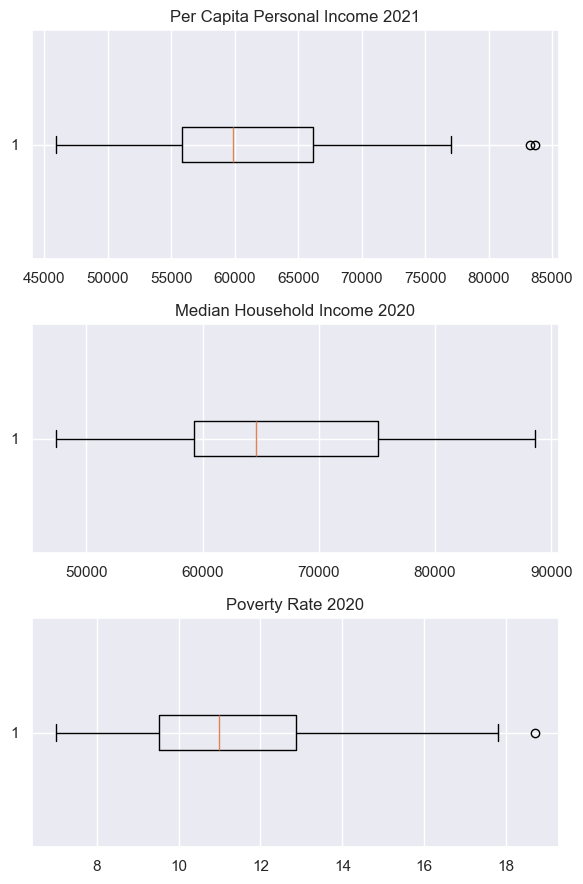

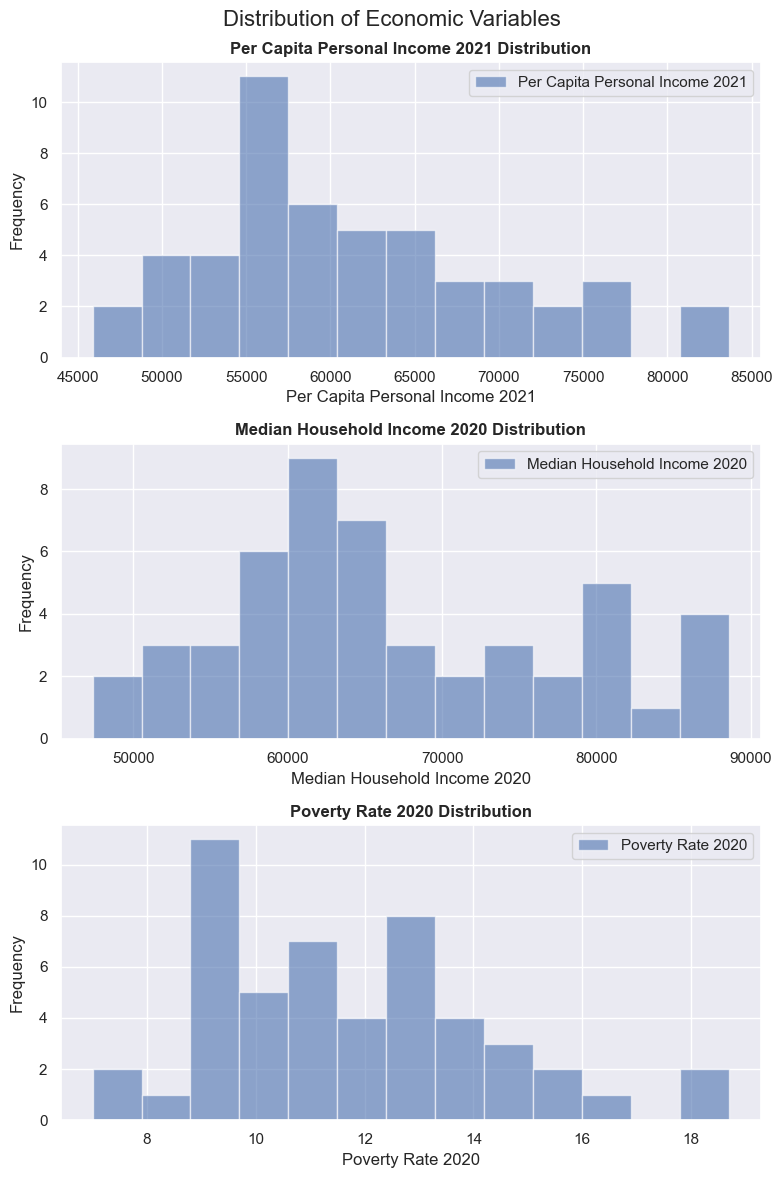

In [9]:
# Analyze the per capita income, median household income, and poverty rates across different states to identify economic disparities using box plots and histograms
economic_columns = ["Per Capita Personal Income 2021", "Median Household Income 2020", "Poverty Rate 2020"]
df_economic = df[economic_columns]

# Create a figure and axes
fig, axs = plt.subplots(nrows=len(df_economic.columns), figsize=(6, 9))

# Create horizontal boxplots for each variable
for ax, column in zip(axs, df_economic.columns):
    ax.boxplot(df_economic[column], vert=False)  # Add vert=False to make the boxplots horizontal
    ax.set_title(column)

# Improve layout
plt.tight_layout()
plt.show()

# Create subplots for each economic indicator
fig, axes = plt.subplots(nrows=len(economic_columns), ncols=1, figsize=(8, 12))

# Generate histograms for each column
for i, col in enumerate(economic_columns):
    axes[i].hist(df_economic[col], bins=13, alpha=0.6, label=col)
    axes[i].set_title(f"{col} Distribution", fontweight = "bold")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Set a common title for the entire plot
fig.suptitle("Distribution of Economic Variables", fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

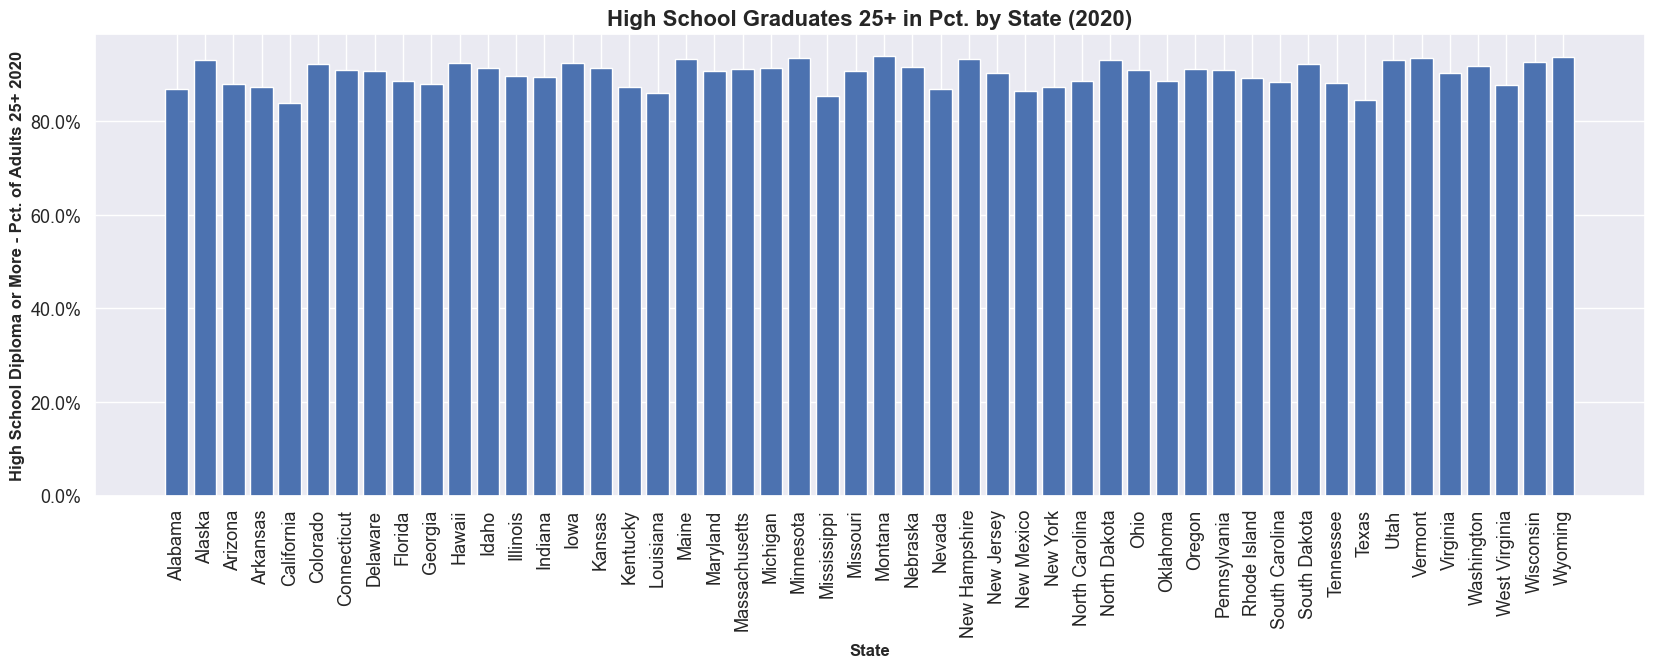

In [97]:
# Identify the percentage of adults 25+ with a high school diploma or more by state in 2020. Use a bar chart for visualization.
# sns.set_style('white')
df_diploma_plus = df[["State", "High School Diploma or More - Pct. of Adults 25+ 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize = (20, 6))
x = df_diploma_plus["State"]
y = df_diploma_plus["High School Diploma or More - Pct. of Adults 25+ 2020"]
# new_x = [2*i for i in x]

plt.bar(height=y,
         x=x,
        #  width=0.5
         )

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title("High School Graduates 25+ in Pct. by State (2020)", fontsize = 16, fontweight = "bold")
plt.ylabel("High School Diploma or More - Pct. of Adults 25+ 2020", fontweight = "bold")
plt.xlabel("State", fontweight = "bold")
# sns.despine()
plt.show()

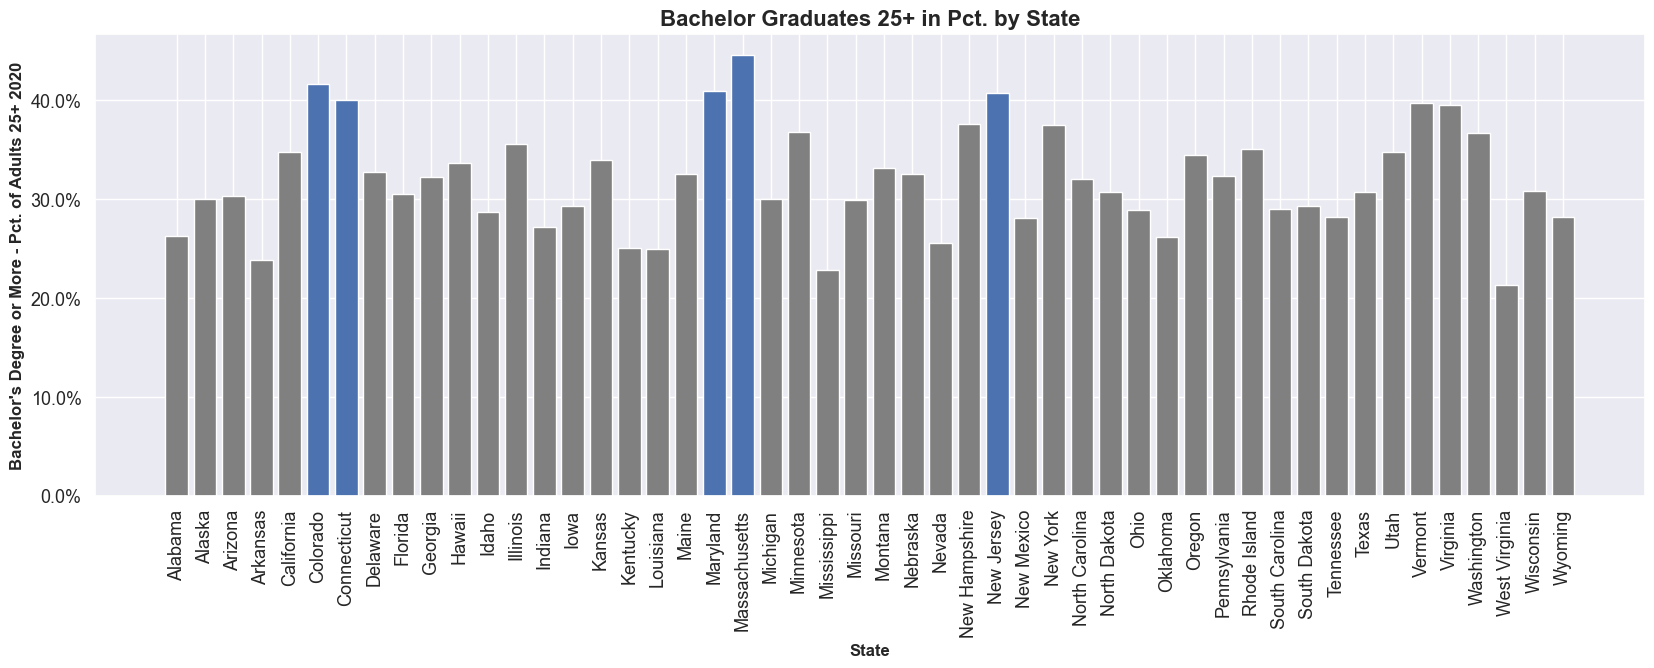

In [98]:
# Percentage of adults 25+ with a bachelor's degree or more by state in 2020. Highlight the top 5 states in a dark blue color.
# sns.set_style('white')
df_diploma_plus = df[["State", "High School Diploma or More - Pct. of Adults 25+ 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize = (20, 6))
x = df_diploma_plus["State"]
y = df_diploma_plus["Bachelor's Degree or More - Pct. of Adults 25+ 2020"]

colors = ['b' if state in df_diploma_plus.nlargest(5, "Bachelor's Degree or More - Pct. of Adults 25+ 2020")["State"].values else 'grey' for state in x]

plt.bar(height=y,
         x=x, color=colors
         )

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title("Bachelor Graduates 25+ in Pct. by State", fontsize = 16, fontweight = "bold")
plt.ylabel("Bachelor's Degree or More - Pct. of Adults 25+ 2020", fontweight = "bold")
plt.xlabel("State", fontweight = "bold")
# sns.despine()
plt.show()

### **Findings**

* In the year 2020, the percentage of adults 25 or older with at least a high school diploma is above 80% for all states.
* California has the lowest percentage of high school graduates 25+ while Montana has the highest percentage.
* In contrast, the percentage of adults with at least a bachelor's degree 25 or older is significantly less than with at least a high school diploma per state.
* This indicates that financial burdens and admission standards for bachelor degrees likely contribute to the disparity between adults 25+ with a high school diploma and a bachelor's degree.
* The top 5 states with the highest percentage of adults 25+ with at least a bachelor's degree are Massachusetts, Colorado, Maryland, New Jersey, and Connecticut.
* Compared to other states, these top 5 states may benefit from a combination of higher high school graduation rates, funding, statewide education standards, scholarships awarded, and in-state scholarship programs.

###**Economic Disparity and Poverty**

C:\Users\Lothos\AppData\Local\Temp\ipykernel_27392\1864948763.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f"{x:.0%}" for x in ax2.get_yticks()])


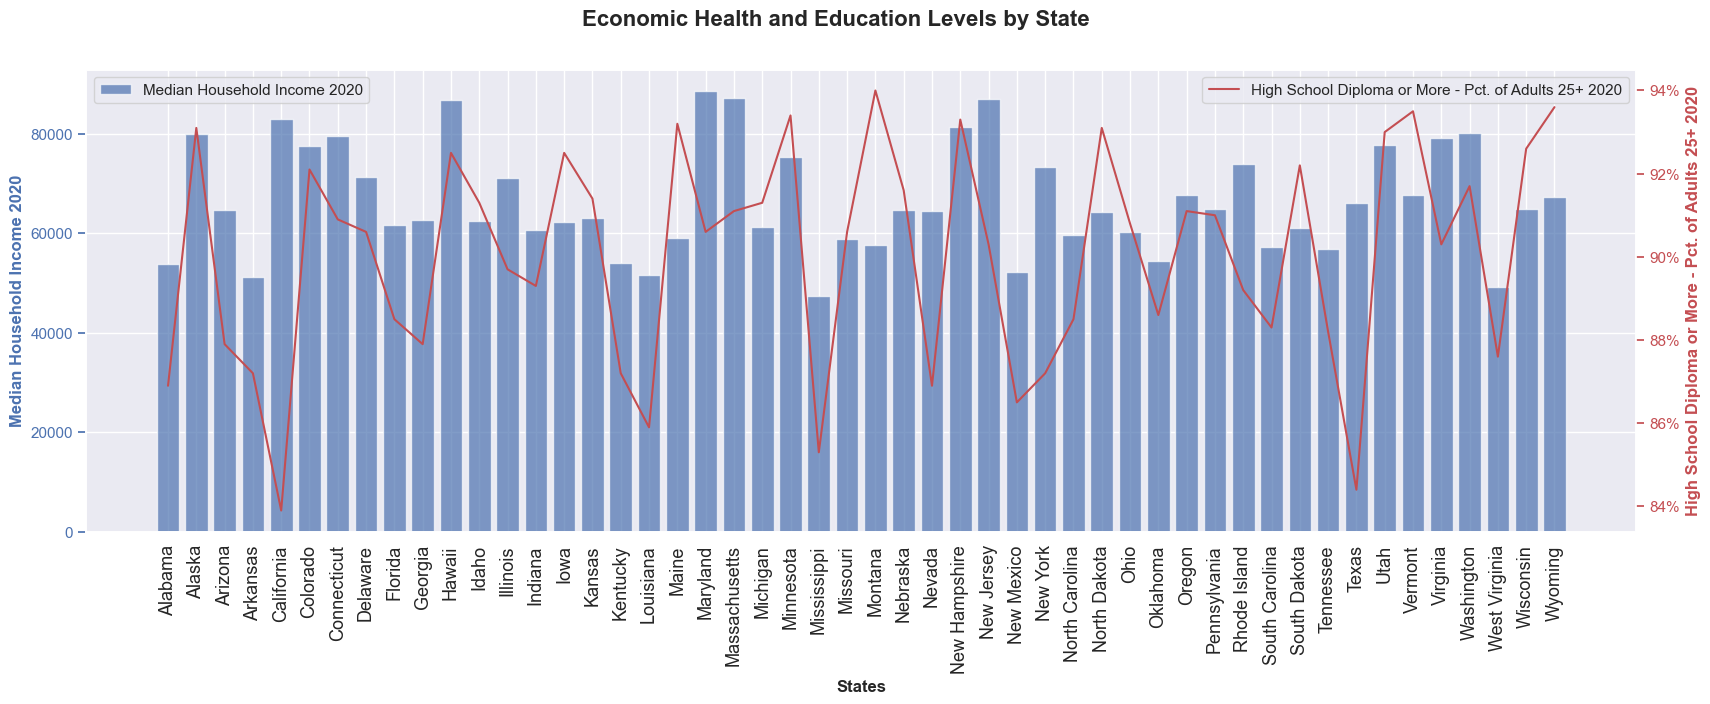

In [90]:
# Identify patterns in infrastructure and development that correlate with economic health, demographic makeup, and education levels, highlighting states with similar characteristics for targeted development or investment. Use a combination plot - bar and line graph to visualize this study
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for median household income
ax1.bar(df["State"], df["Median Household Income 2020"], color="b", alpha=0.7, label="Median Household Income 2020")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Median Household Income 2020", color="b", fontweight = "bold")
ax1.tick_params(axis="x", rotation=90, labelsize = 13)
ax1.tick_params(axis="y", colors="b")

# Line plot for high school diploma or more percentage
ax2 = ax1.twinx()
ax2.plot(df["State"], df["High School Diploma or More - Pct. of Adults 25+ 2020"], color="r", label="High School Diploma or More - Pct. of Adults 25+ 2020")
ax2.set_ylabel("High School Diploma or More - Pct. of Adults 25+ 2020", color="r", fontweight = "bold")
# Set y-axis tick labels to percentages
ax2.set_yticklabels([f"{x:.0%}" for x in ax2.get_yticks()])
ax2.tick_params(axis="y", colors="r")

# Disable the grid lines for ax2
ax2.grid(False)

# Title and legend
fig.suptitle("Economic Health and Education Levels by State", fontsize = 16, fontweight = "bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

* The combination plot (bar and line graph) highlights the relationship between median household income and the percentage of adults with at least a high school diploma. 
* States with higher median household incomes generally exhibit higher education levels.

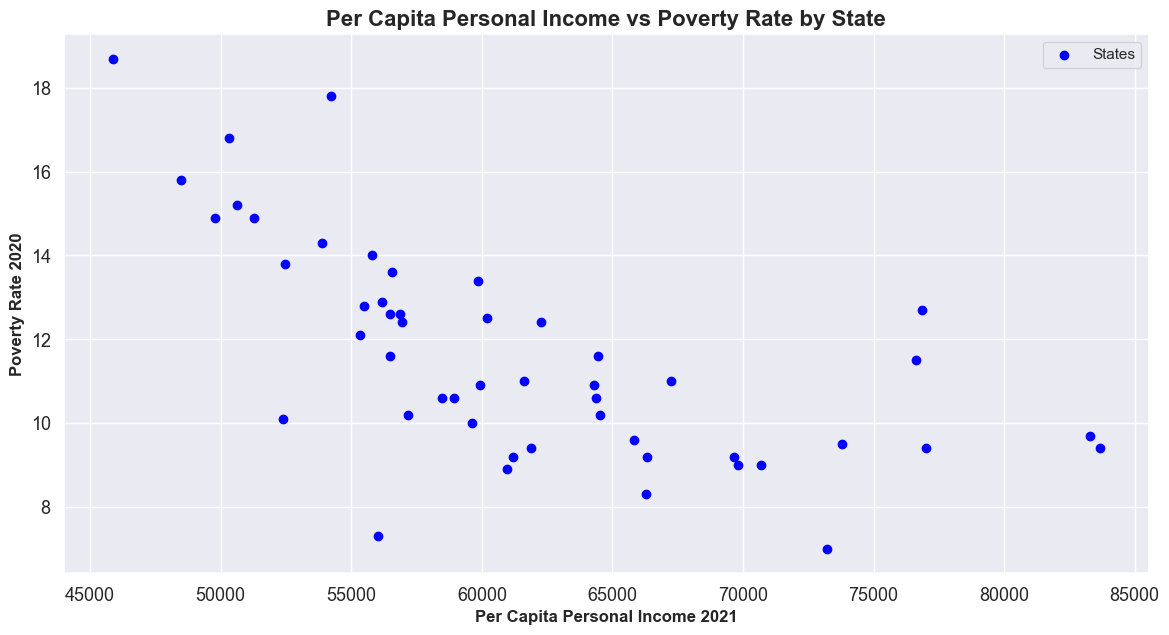

In [91]:
# Measure the economic disparity by plotting per capita personal income against the poverty rate for each state. Use a scatter plot for this analysis
# Plot a scatter plot for per capita personal income against the poverty rate for each state
plt.figure(figsize=(14, 7))
plt.scatter(df["Per Capita Personal Income 2021"], df["Poverty Rate 2020"], color="blue", label="States")
plt.title("Per Capita Personal Income vs Poverty Rate by State", fontsize = 16, fontweight = "bold")
plt.xlabel("Per Capita Personal Income 2021", fontweight = "bold")
plt.ylabel("Poverty Rate 2020", fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.legend()
plt.show()

* The scatter plot shows a general trend where states with higher per capita personal income tend to have lower poverty rates. 
* However, there are notable exceptions indicating disparities within states.

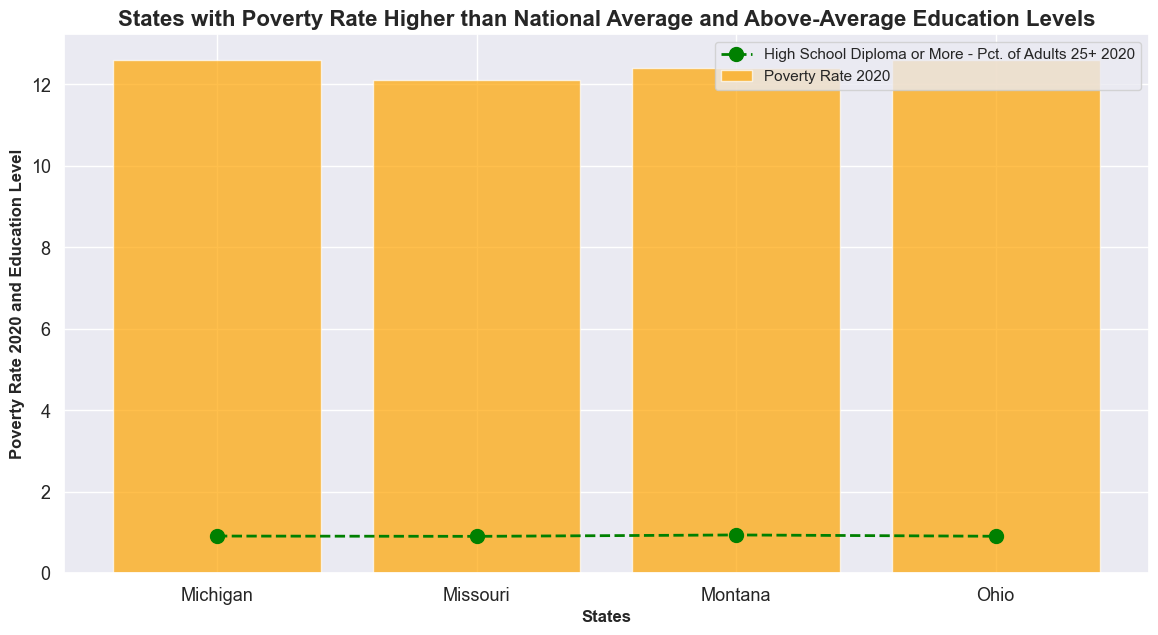

,State,Poverty Rate 2020,High School Diploma or More - Pct. of Adults 25+ 2020
22,Michigan,12.6,0.913
25,Missouri,12.1,0.906
26,Montana,12.4,0.940
35,Ohio,12.6,0.908


In [88]:
# Identify and visualize the states with a poverty rate higher than the national average but with above-average education levels (high school diploma or more, bachelor's degree or more).

# Calculate the national average for poverty rate
national_avg_poverty_rate = df["Poverty Rate 2020"].mean()
# Identify states with a poverty rate higher than the national average but with above-average education levels
above_avg_education = df[(df["Poverty Rate 2020"] > national_avg_poverty_rate) &
                         (df["High School Diploma or More - Pct. of Adults 25+ 2020"] > df["High School Diploma or More - Pct. of Adults 25+ 2020"].mean())]
#Visualize the states with a poverty rate higher than the national average but with above-average education levels
plt.figure(figsize = (14, 7))
plt.bar(above_avg_education["State"], above_avg_education["Poverty Rate 2020"], color = "orange", alpha = 0.7, label = "Poverty Rate 2020")
plt.plot(above_avg_education["State"], above_avg_education["High School Diploma or More - Pct. of Adults 25+ 2020"], color="green", marker="o", linestyle="dashed", linewidth=2, markersize=10, label="High School Diploma or More - Pct. of Adults 25+ 2020")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Poverty Rate 2020 and Education Level", fontweight = "bold")
plt.title("States with Poverty Rate Higher than National Average and Above-Average Education Levels", fontsize = 16, fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.grid(True)
plt.show()

# Display the dataframe in a user-friendly format
above_avg_education[["State", "Poverty Rate 2020", "High School Diploma or More - Pct. of Adults 25+ 2020"]]

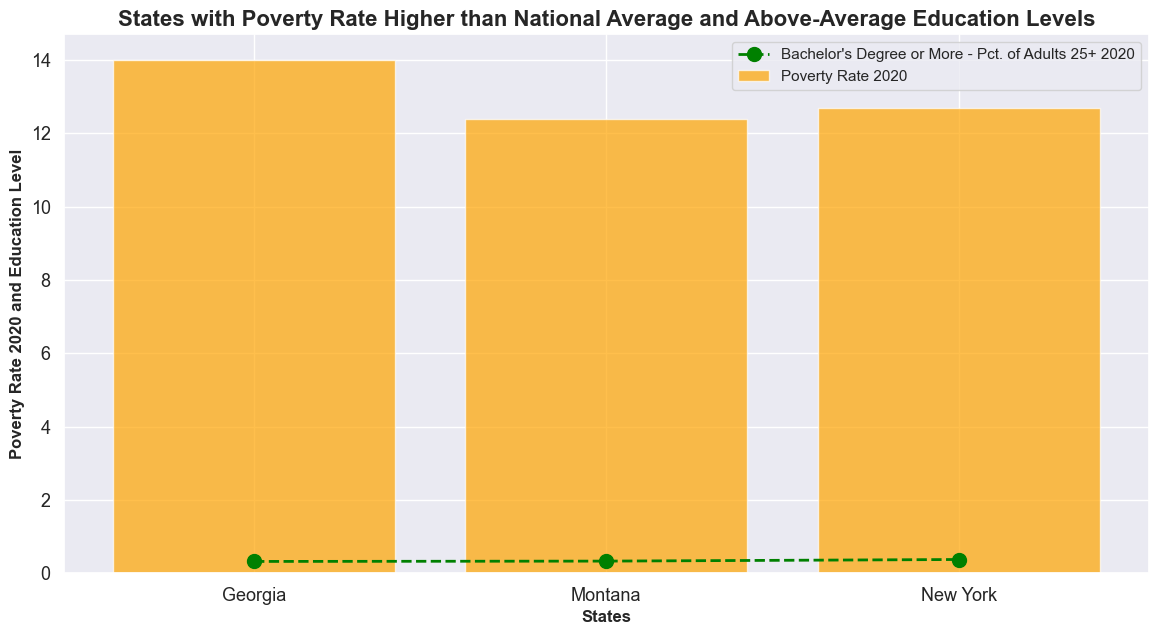

,State,Poverty Rate 2020,Bachelor's Degree or More - Pct. of Adults 25+ 2020
10,Georgia,14.0,0.322
26,Montana,12.4,0.331
32,New York,12.7,0.375


In [89]:
# Calculate the national average for poverty rate
national_avg_poverty_rate = df["Poverty Rate 2020"].mean()
# Identify states with a poverty rate higher than the national average but with above-average education levels
above_avg_education = df[(df["Poverty Rate 2020"] > national_avg_poverty_rate) &
                         (df["Bachelor's Degree or More - Pct. of Adults 25+ 2020"] > df["Bachelor's Degree or More - Pct. of Adults 25+ 2020"].mean())]
#Visualize the states with a poverty rate higher than the national average but with above-average education levels
plt.figure(figsize = (14, 7))
plt.bar(above_avg_education["State"], above_avg_education["Poverty Rate 2020"], color = "orange", alpha = 0.7, label = "Poverty Rate 2020")
plt.plot(above_avg_education["State"], above_avg_education["Bachelor's Degree or More - Pct. of Adults 25+ 2020"], color="green", marker="o", linestyle="dashed", linewidth=2, markersize=10, label="Bachelor's Degree or More - Pct. of Adults 25+ 2020")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Poverty Rate 2020 and Education Level", fontweight = "bold")
plt.title("States with Poverty Rate Higher than National Average and Above-Average Education Levels", fontsize = 16, fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.grid(True)
plt.show()

# Display the dataframe in a user-friendly format
above_avg_education[["State", "Poverty Rate 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]

* Michigan, Missouri, Montana, and Ohio stand out with higher poverty rates yet above-average education levels (High School Diploma or more). 
* Georgia, Montana, and New York stand out with higher poverty rates yet above-average education levels (Bachelor's degree or more).
* This indicates that factors other than education, such as job availability, and economic opportunities, may play a significant role in the economic disparity in these states.

###**Sector Analysis**

In [ ]:
# Plot the percentage of all jobs that are in manufacturing by state in 2021, and highlight the top and bottom 5 states.
# Compare the average wage in the manufacturing sector to the overall average wage per job for each state using a dual-axis chart.

# ^ Replicate the above analysis for the Healthcare(Social Assist), Finance(and Insurance) and Transportation(and Warehousing) sector